In [42]:
# 🩺 Medical Insurance Cost Prediction
# -----------------------------------
# Predicts insurance charges using regression models

# Step 1️⃣ - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

# Step 2️⃣ - Load dataset
df = pd.read_csv("insurance_data.csv")  # make sure the file is in the same folder
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [27]:
# Step 3️⃣ - Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.0000

In [28]:
# Step 4️⃣ - Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64


In [29]:
# Step 5️⃣ - Encode categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker']) # yes=1, no=0

df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


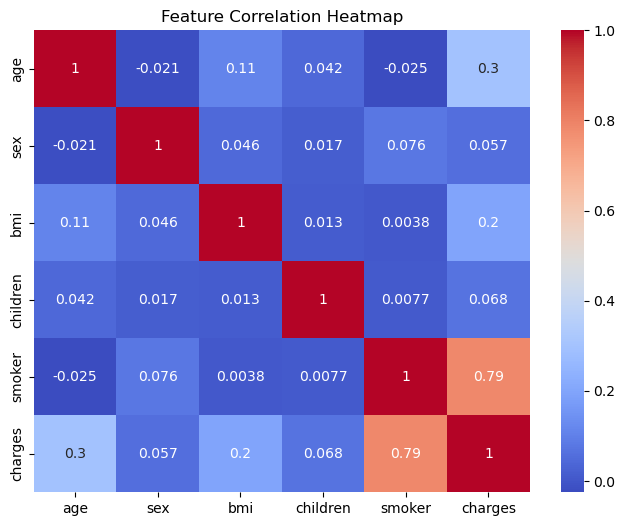

In [30]:
# Step 6️⃣ - Feature correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


📊 Linear Regression Performance:
MAE: 4213.48
RMSE: 5829.17
R²: 0.78

📊 Random Forest Regressor Performance:
MAE: 2548.53
RMSE: 4698.57
R²: 0.86

📊 AdaBoost Regressor Performance:
MAE: 4449.41
RMSE: 5283.61
R²: 0.82


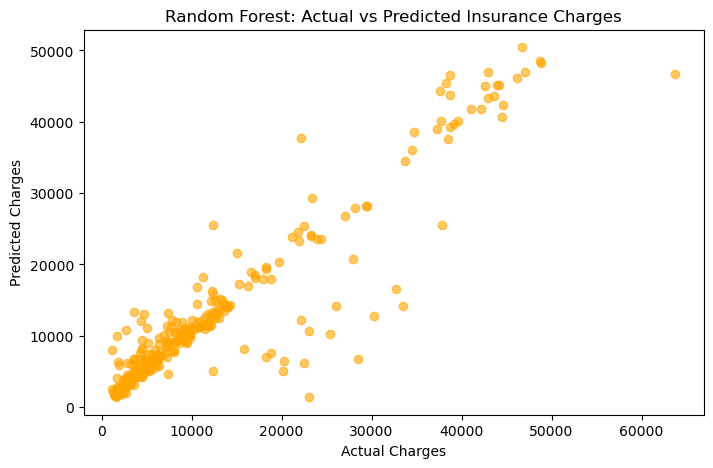

In [35]:
# Step 7️⃣ - Split dataset
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8️⃣ - Train models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# AdaBoost
ada = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Step 9️⃣ - Evaluation Function
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

# Step 🔟 - Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_ada, "AdaBoost Regressor")

# Step 1️⃣1️⃣ - Compare visually (AdaBoost example)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs Predicted Insurance Charges")
plt.show()


📊 LinearRegression Performance:
MAE: 4213.48
RMSE: 5829.17
R²: 0.78

📊 Ridge Performance:
MAE: 4225.74
RMSE: 5832.60
R²: 0.78

📊 Lasso Performance:
MAE: 4214.20
RMSE: 5829.46
R²: 0.78
Fitting 3 folds for each of 96 candidates, totalling 288 fits

📊 Random Forest (Tuned) Performance:
MAE: 2492.93
RMSE: 4448.39
R²: 0.87
Fitting 3 folds for each of 36 candidates, totalling 108 fits

📊 AdaBoost (Tuned) Performance:
MAE: 3213.30
RMSE: 4806.50
R²: 0.85

🏆 Best Performing Model: RandomForest
Best Parameters: RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)


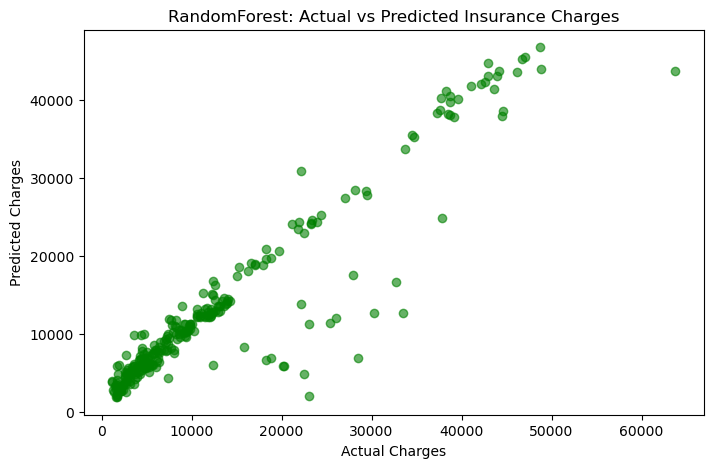

In [36]:
# Step 8️⃣ - Train Models with GridSearchCV Optimization
from sklearn.model_selection import GridSearchCV

# 💡 Define evaluation function
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    return r2

best_models = {}
best_scores = {}

# 1️⃣ Linear Regression with GridSearchCV (using regularization options)
from sklearn.linear_model import Ridge, Lasso

lr_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

param_lr = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]}
}

for name, model in lr_models.items():
    grid = GridSearchCV(model, param_lr[name], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    r2 = evaluate_model(y_test, y_pred, name)
    best_models[name] = grid.best_estimator_
    best_scores[name] = r2

# 2️⃣ Random Forest with GridSearchCV
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest (Tuned)")
best_models["RandomForest"] = grid_rf.best_estimator_
best_scores["RandomForest"] = r2_rf

# 3️⃣ AdaBoost with GridSearchCV
param_ada = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'loss': ['linear', 'square', 'exponential']
}

ada = AdaBoostRegressor(random_state=42)
grid_ada = GridSearchCV(ada, param_ada, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_ada.fit(X_train, y_train)
y_pred_ada = grid_ada.predict(X_test)
r2_ada = evaluate_model(y_test, y_pred_ada, "AdaBoost (Tuned)")
best_models["AdaBoost"] = grid_ada.best_estimator_
best_scores["AdaBoost"] = r2_ada

# Step 9️⃣ - Find Best Model Overall
best_model_name = max(best_scores, key=best_scores.get)
print(f"\n🏆 Best Performing Model: {best_model_name}")
print("Best Parameters:", best_models[best_model_name])

# Step 🔟 - Visual Comparison (Best Model)
plt.figure(figsize=(8,5))
plt.scatter(y_test, best_models[best_model_name].predict(X_test), color='green', alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"{best_model_name}: Actual vs Predicted Insurance Charges")
plt.show()



In [37]:
import pickle

# 💾 Save the best Random Forest model to .sav file
filename = 'best_random_forest_model.sav'
pickle.dump(grid_rf.best_estimator_, open(filename, 'wb'))

print(f"✅ Random Forest model saved successfully as '{filename}'")

✅ Random Forest model saved successfully as 'best_random_forest_model.sav'


In [38]:
# 🔁 Load the saved Random Forest model
loaded_rf_model = pickle.load(open('best_random_forest_model.sav', 'rb'))

# ✅ Make predictions using the loaded model
y_pred_loaded = loaded_rf_model.predict(X_test)

# Evaluate to confirm it's working fine
evaluate_model(y_test, y_pred_loaded, "Loaded Random Forest Model (.sav)")



📊 Loaded Random Forest Model (.sav) Performance:
MAE: 2492.93
RMSE: 4448.39
R²: 0.87


0.8725387782820676

In [41]:
# ✅ Input feature order (must match training order):
# ['age', 'sex', 'bmi', 'children', 'smoker']

# Example input
age = 19
sex = 0         # 0 = female, 1 = male
bmi = 27.9
children = 0
smoker = 1      # 1 = yes, 0 = no

# Make prediction
result = loaded_rf_model.predict([[age, sex, bmi, children, smoker]])

print(f"💰 Predicted Insurance Charges: ${result[0]:.2f}")

💰 Predicted Insurance Charges: $17731.42


age	sex	bmi	children	smoker	charges
19	0	27.900	0	1	16884.92400
18	1	33.770	1	0	1725.55230
28	1	33.000	3	0	4449.46200